C:\Users\jjoa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jjoa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


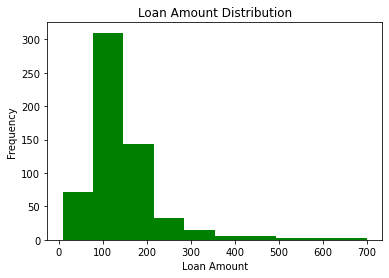

<ipython-input-372-a59fcbc40883>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['Credit_History'] != 0][train['Credit_History'] != 1]


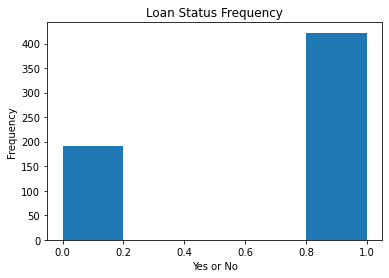

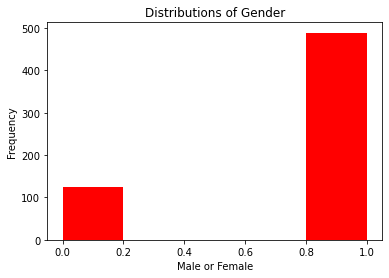

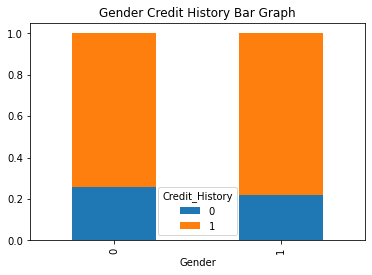

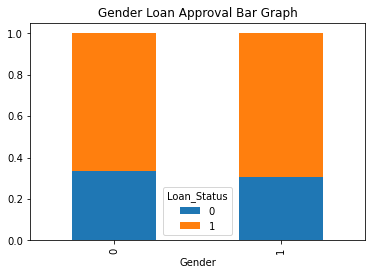

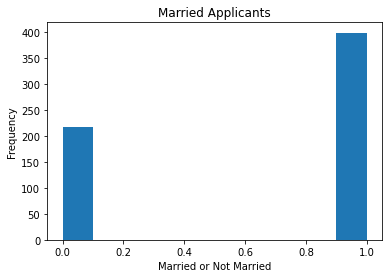

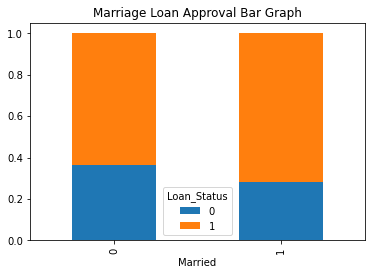

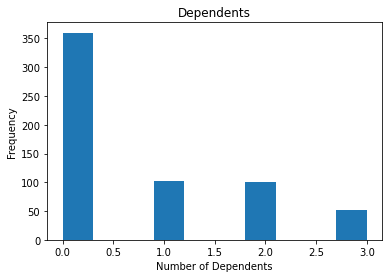

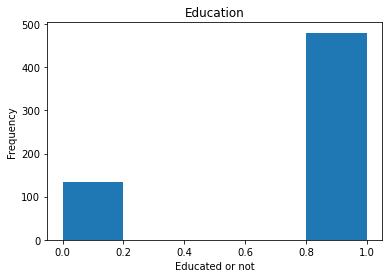

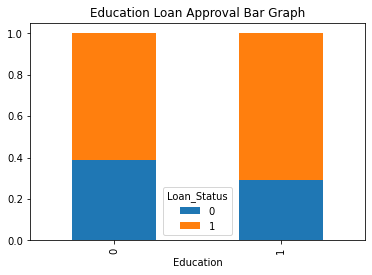

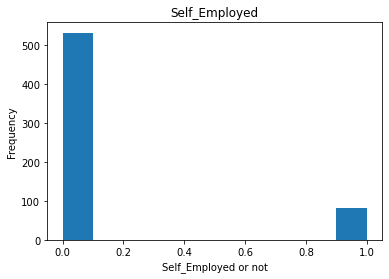

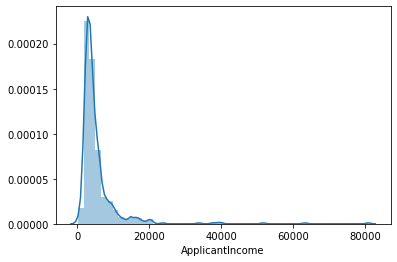

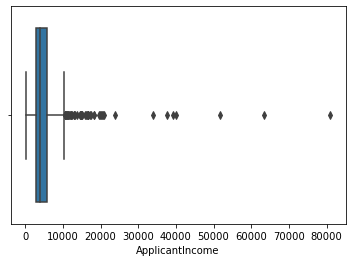

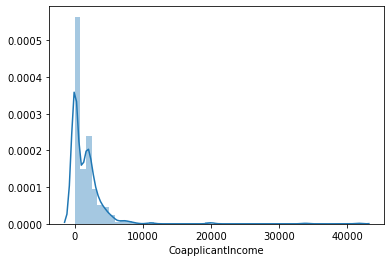

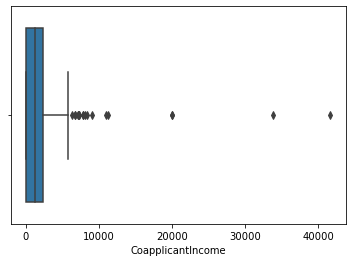

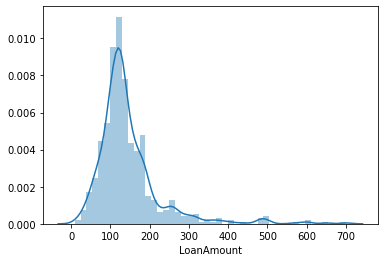

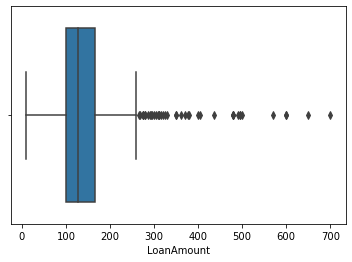

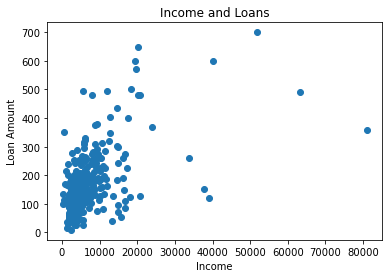

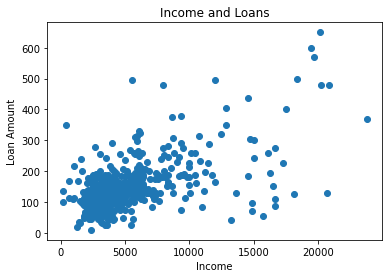

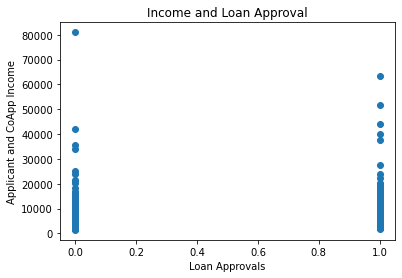

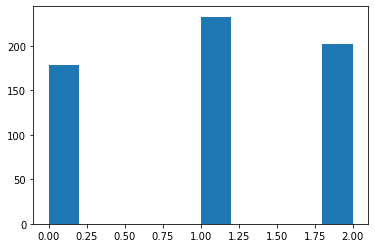

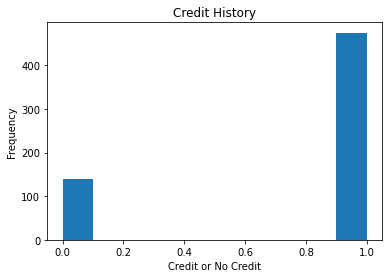

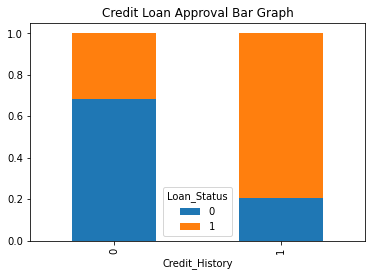

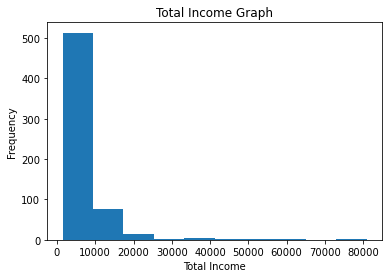

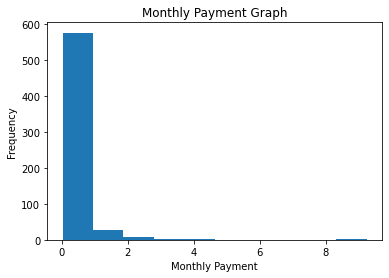

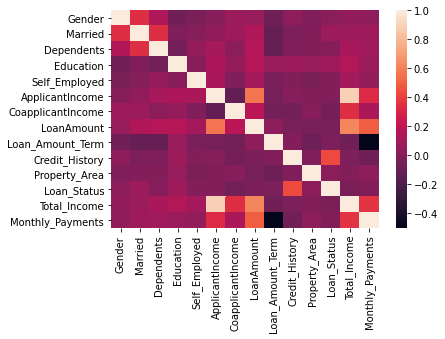

<ipython-input-372-bf328fc75049>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test[test['Self_Employed'] != 'No'][test['Self_Employed'] != 'Yes']
<ipython-input-372-a56a2e344706>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test[test['Gender'] != 'Male'][test['Gender'] != 'Female']


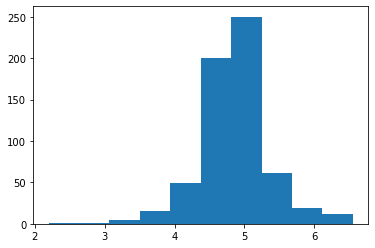

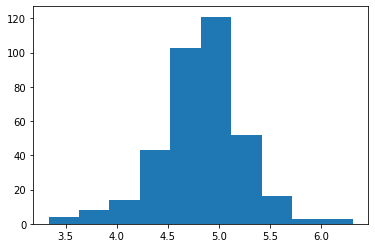

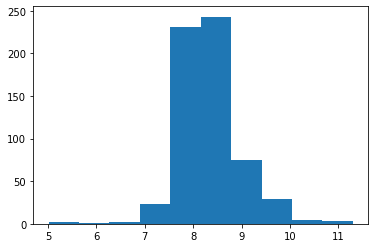

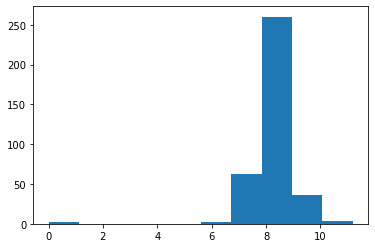

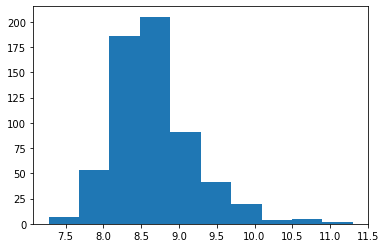

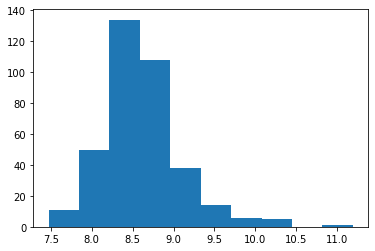

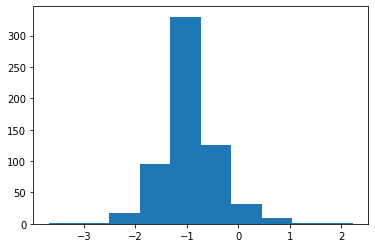

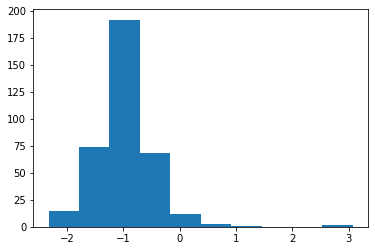

In [372]:
%run DataPreprocessing.ipynb

## Function to produce all metrics

In [221]:
def print_metrics(model):
    table = [{str(model) : model.score(X_train, y_train)}, {str(model): model.score(X_val, y_val)}, {str(model): cross_val_score(model, X_val, y_val).mean()}, {str(model): precision_score(y_val, model.predict(X_val))}, {str(model): recall_score(y_val, model.predict(X_val))}, {str(model): f1_score(y_val, model.predict(X_val))}, {str(model): roc_auc_score(y_val, model.predict(X_val))}]
    table = pd.DataFrame(table, index = ['Training Accuracy', 'Testing Accuracy', 'Cross Validation','Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    return table

## Function to produce all metrics for GridSearch

In [222]:
def print_gs_metrics(model):
    table = [{str(model): model.best_params_}, {str(model) : model.score(X_train, y_train)}, {str(model): model.score(X_val, y_val)}, {str(model): cross_val_score(model, X_val, y_val).mean()}, {str(model): precision_score(y_val, model.predict(X_val))}, {str(model): recall_score(y_val, model.predict(X_val))}, {str(model): f1_score(y_val, model.predict(X_val))}, {str(model): roc_auc_score(y_val, model.predict(X_val))}]
    table = pd.DataFrame(table, index = ['Best Params', 'Training Accuracy', 'Testing Accuracy', 'Cross Validation','Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    return table

## 1) Logistic Regression 

In [425]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [224]:
lr_model = LogisticRegression()

In [225]:
lr_model.fit(X_train, y_train)

LogisticRegression()

#### Gridsearch

In [226]:
pipe_lr = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

pipe_lr_params = {'lr__penalty': ['l1', 'l2'],
                  'lr__C': [1.0, 0.5, 0.1]}

In [227]:
gs_lr = GridSearchCV(pipe_lr, pipe_lr_params, n_jobs = -1, cv=5, verbose=1)

In [228]:
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'lr__C': [1.0, 0.5, 0.1], 'lr__penalty': ['l1', 'l2']},
             verbose=1)

In [229]:
gs_lr.best_params_

{'lr__C': 0.1, 'lr__penalty': 'l1'}

In [230]:
gs_lr.best_score_

0.773913043478261

In [231]:
gs_lr.score(X_val, y_val)

0.7597402597402597

#### Metrics

In [232]:
print_metrics(lr_model)

C:\Users\jjoa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jjoa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,LogisticRegression()
Training Accuracy,0.754348
Testing Accuracy,0.733766
Cross Validation,0.733978
Precision,0.736000
Recall,0.920000
F1 Score,0.817778
ROC AUC,0.654444


In [233]:
print_gs_metrics(gs_lr)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


,"GridSearchCV(cv=5,\n estimator=Pipeline(steps=[('ss', StandardScaler()),\n ('lr',\n LogisticRegression(solver='liblinear'))]),\n n_jobs=-1,\n param_grid={'lr__C': [1.0, 0.5, 0.1], 'lr__penalty': ['l1', 'l2']},\n verbose=1)"
Best Params,"{'lr__C': 0.1, 'lr__penalty': 'l1'}"
Training Accuracy,0.773913
Testing Accuracy,0.75974
Cross Validation,0.759355
Precision,0.769231
Recall,0.9
F1 Score,0.829493
ROC AUC,0.7


#### Cross Validation Test

In [234]:
lr_model.score(X_val, y_val) #Test score

0.7337662337662337

In [235]:
cross_val_score(lr_model, X_val, y_val).mean()

C:\Users\jjoa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jjoa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.7339784946236559

## 2) Decision Tree

In [238]:
from sklearn.tree import DecisionTreeClassifier

In [239]:
dt = DecisionTreeClassifier()

In [240]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### GridSearch

In [241]:
dt_params = {'max_depth': [2, 3, 5, 7],
            'min_samples_split': [5, 10, 15, 20],
            'min_samples_leaf': [2, 3, 4, 5, 6],
            'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]}

gs_dt = GridSearchCV(dt, dt_params, n_jobs = -1, cv=5, verbose=1)

In [242]:
gs_dt.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2071 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [243]:
gs_dt.best_params_

{'ccp_alpha': 0,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [244]:
gs_dt.best_score_

0.7695652173913043

In [245]:
gs_dt.score(X_val, y_val)

0.7337662337662337

#### Metrics

In [246]:
print_metrics(dt)

,DecisionTreeClassifier()
Training Accuracy,1.000000
Testing Accuracy,0.675325
Cross Validation,0.655269
Precision,0.750000
Recall,0.750000
F1 Score,0.750000
ROC AUC,0.643519


In [247]:
print_gs_metrics(gs_dt)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 2071 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.3s finished


,"GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,\n param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],\n 'max_depth': [2, 3, 5, 7],\n 'min_samples_leaf': [2, 3, 4, 5, 6],\n 'min_samples_split': [5, 10, 15, 20]},\n verbose=1)"
Best Params,"{'ccp_alpha': 0, 'max_depth': 3, 'min_samples_..."
Training Accuracy,0.8
Testing Accuracy,0.733766
Cross Validation,0.753118
Precision,0.747899
Recall,0.89
F1 Score,0.812785
ROC AUC,0.667222


In [249]:
gs_dt.best_params_

{'ccp_alpha': 0,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

#### Cross Validation Test

In [250]:
dt.score(X_val, y_val)

0.6753246753246753

In [251]:
cross_val_score(dt, X_val, y_val).mean()

0.6750537634408602

## 3) Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rfc = RandomForestClassifier(n_jobs=-1) # n_jobs = -1 allows the training speed to be faster.

In [254]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

### GridSearch

In [255]:
rfc_params = {'n_estimators': [100, 150, 200], 
            'max_depth': [None, 1, 2, 3, 4, 5],}
gs_rfc = GridSearchCV(rfc, rfc_params, n_jobs = -1, cv = 5, verbose = 1)

In [256]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [257]:
gs_rfc.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [258]:
gs_rfc.best_score_

0.7499999999999998

In [259]:
gs_rfc.score(X_val, y_val)

0.7532467532467533

### Metrics

In [260]:
print_metrics(rfc)

,RandomForestClassifier(n_jobs=-1)
Training Accuracy,1.000000
Testing Accuracy,0.740260
Cross Validation,0.635914
Precision,0.758621
Recall,0.880000
F1 Score,0.814815
ROC AUC,0.680741


In [261]:
print_gs_metrics(gs_rfc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.4s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.5s finished


,"GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,\n param_grid={'max_depth': [None, 1, 2, 3, 4, 5],\n 'n_estimators': [100, 150, 200]},\n verbose=1)"
Best Params,"{'max_depth': 4, 'n_estimators': 100}"
Training Accuracy,0.83913
Testing Accuracy,0.753247
Cross Validation,0.668387
Precision,0.754098
Recall,0.92
F1 Score,0.828829
ROC AUC,0.682222


#### Cross Validation Test

In [262]:
rfc.score(X_val, y_val)

0.7402597402597403

In [263]:
cross_val_score(rfc, X_val, y_val).mean()

0.687741935483871

## 4) Support Vector Machine (We must use our scaled data for this because its a distance based model)

In [264]:
from sklearn.svm import SVC

In [265]:
svc = SVC()

In [266]:
svc.fit(x_train_scaled, y_train)

SVC()

### GridSearch

In [267]:
pgrid = {"C": np.linspace(0.0001, 2, 10)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_svc = GridSearchCV(svc, pgrid, n_jobs = -1, cv = cv, verbose = 1)
gs_svc.fit(x_train_scaled, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [268]:
gs_svc.best_params_

{'C': 0.6667333333333333}

In [269]:
gs_svc.best_score_

0.7630434782608695

In [270]:
gs_svc.score(x_val_scaled, y_val)

0.7597402597402597

#### Metrics

In [271]:
print_metrics(svc)

,SVC()
Training Accuracy,0.700000
Testing Accuracy,0.649351
Cross Validation,0.643011
Precision,0.649351
Recall,1.000000
F1 Score,0.787402
ROC AUC,0.500000


In [272]:
print_gs_metrics(gs_svc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


,"GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),\n estimator=SVC(), n_jobs=-1,\n param_grid={'C': array([1.00000000e-04, 2.22311111e-01, 4.44522222e-01, 6.66733333e-01,\n 8.88944444e-01, 1.11115556e+00, 1.33336667e+00, 1.55557778e+00,\n 1.77778889e+00, 2.00000000e+00])},\n verbose=1)"
Best Params,{'C': 0.6667333333333333}
Training Accuracy,0.7
Testing Accuracy,0.649351
Cross Validation,0.643011
Precision,0.649351
Recall,1
F1 Score,0.787402
ROC AUC,0.5


#### Cross Validation Test

In [273]:
svc.score(x_val_scaled, y_val)

0.7597402597402597

In [274]:
cross_val_score(svc, x_val_scaled, y_val).mean()

0.7397849462365591

## 5) K-Nearest Neighbor (We must use our scaled data for this because its a distance based model)


In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
knn = KNeighborsClassifier()

In [277]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [278]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

#### GridSearch

In [279]:
gs_knn_params = {'p': [1, 2], 
                 'weights': ['uniform', 'distance'],
                 'n_neighbors': [3, 5, 10]}

In [280]:
gs_knn = GridSearchCV(knn, gs_knn_params, n_jobs = -1, cv = 5, verbose = 1)
gs_knn.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

#### Metrics

In [281]:
print_metrics(knn)

,KNeighborsClassifier()
Training Accuracy,0.700000
Testing Accuracy,0.642857
Cross Validation,0.544516
Precision,0.649007
Recall,0.980000
F1 Score,0.780876
ROC AUC,0.499259


In [282]:
print_gs_metrics(gs_knn)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished


,"GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,\n param_grid={'n_neighbors': [3, 5, 10], 'p': [1, 2],\n 'weights': ['uniform', 'distance']},\n verbose=1)"
Best Params,"{'n_neighbors': 10, 'p': 2, 'weights': 'distan..."
Training Accuracy,0.684783
Testing Accuracy,0.649351
Cross Validation,0.596559
Precision,0.661972
Recall,0.94
F1 Score,0.77686
ROC AUC,0.525556


In [283]:
gs_knn.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

#### Cross Validation Test

In [284]:
knn.score(x_val_scaled, y_val)

0.7077922077922078

In [285]:
cross_val_score(knn, x_val_scaled, y_val).mean()

0.7075268817204301

## 6) Gradient Boosting

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
gbc = GradientBoostingClassifier()

In [288]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

### GridSearch

In [289]:
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [.08, .1, .12]
}

In [290]:
gs_gb = GridSearchCV(gbc, gboost_params, n_jobs = -1, cv = 5, verbose = 1)
gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 125, 150]},
             verbose=1)

#### Metrics

In [291]:
print_metrics(gbc)

,GradientBoostingClassifier()
Training Accuracy,0.921739
Testing Accuracy,0.720779
Cross Validation,0.694409
Precision,0.743590
Recall,0.870000
F1 Score,0.801843
ROC AUC,0.657222


In [292]:
print_gs_metrics(gs_gb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.1s finished


,"GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,\n param_grid={'learning_rate': [0.08, 0.1, 0.12],\n 'max_depth': [2, 3, 4],\n 'n_estimators': [100, 125, 150]},\n verbose=1)"
Best Params,"{'learning_rate': 0.08, 'max_depth': 2, 'n_est..."
Training Accuracy,0.841304
Testing Accuracy,0.75974
Cross Validation,0.72086
Precision,0.764706
Recall,0.91
F1 Score,0.83105
ROC AUC,0.695741


In [293]:
gs_gb.best_params_

{'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 125}

#### Cross Validation Test

In [294]:
gbc.score(X_val, y_val)

0.7207792207792207

In [295]:
cross_val_score(gbc, X_val, y_val).mean()

0.6688172043010752

## 7) Naive-Bayes

In [296]:
from sklearn.naive_bayes import GaussianNB

In [297]:
gnb = GaussianNB()

In [298]:
gnb.fit(X_train, y_train)

GaussianNB()

In [299]:
# There are no hyparameters to tune over.
gnb.get_params().keys() 

dict_keys(['priors', 'var_smoothing'])

#### Metrics

In [300]:
print_metrics(gnb)

,GaussianNB()
Training Accuracy,0.741304
Testing Accuracy,0.701299
Cross Validation,0.654194
Precision,0.698529
Recall,0.950000
F1 Score,0.805085
ROC AUC,0.595370


#### Cross Validation Test

In [301]:
gnb.score(X_val, y_val)

0.7012987012987013

In [302]:
cross_val_score(gnb, x_val_scaled, y_val).mean()

0.6606451612903226

# All models as a comparison

In [303]:
all_models = [print_metrics(lr_model), print_metrics(dt), print_metrics(rfc), print_metrics(svc), print_metrics(knn), print_metrics(gbc), print_metrics(gnb)]

C:\Users\jjoa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jjoa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [304]:
table_all_models= pd.concat(all_models, axis = 1)
table_all_models.set_axis(['Logistic Regression', 'Decision Tree', 'Random Forest', 
                    'Support Vector Machine','KNN', 'Gradient Boosting', 'Naive Bayes'], axis = 1)

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,KNN,Gradient Boosting,Naive Bayes
Training Accuracy,0.754348,1.000000,1.000000,0.700000,0.700000,0.921739,0.741304
Testing Accuracy,0.733766,0.675325,0.740260,0.649351,0.642857,0.720779,0.701299
Cross Validation,0.733978,0.648387,0.655054,0.643011,0.544516,0.694409,0.654194
Precision,0.736000,0.750000,0.758621,0.649351,0.649007,0.743590,0.698529
Recall,0.920000,0.750000,0.880000,1.000000,0.980000,0.870000,0.950000
F1 Score,0.817778,0.750000,0.814815,0.787402,0.780876,0.801843,0.805085
ROC AUC,0.654444,0.643519,0.680741,0.500000,0.499259,0.657222,0.595370


# All GridSearch models as a comparison

In [305]:
all_gs_models = [print_gs_metrics(gs_lr), print_gs_metrics(gs_dt), print_gs_metrics(gs_rfc), print_gs_metrics(gs_svc), print_gs_metrics(gs_knn), print_gs_metrics(gs_gb)]

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2071 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.1s finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 2071 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.6s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.3s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.7s finished


In [306]:
gs_table = pd.concat(all_gs_models, axis = 1)
columns = gs_table.columns
gs_table.set_axis(['Logistic Regression', 'Decision Tree GS', 'Random Forest GS', 
                    'Support Vector Machine GS','KNN GS', 'Gradient Boosting GS'], axis = 1)

,Logistic Regression,Decision Tree GS,Random Forest GS,Support Vector Machine GS,KNN GS,Gradient Boosting GS
Best Params,"{'lr__C': 0.1, 'lr__penalty': 'l1'}","{'ccp_alpha': 0, 'max_depth': 3, 'min_samples_...","{'max_depth': 4, 'n_estimators': 100}",{'C': 0.6667333333333333},"{'n_neighbors': 10, 'p': 2, 'weights': 'distan...","{'learning_rate': 0.08, 'max_depth': 2, 'n_est..."
Training Accuracy,0.773913,0.8,0.83913,0.7,0.684783,0.841304
Testing Accuracy,0.75974,0.733766,0.753247,0.649351,0.649351,0.75974
Cross Validation,0.759355,0.753118,0.681505,0.643011,0.596559,0.707957
Precision,0.769231,0.747899,0.754098,0.649351,0.661972,0.764706
Recall,0.9,0.89,0.92,1,0.94,0.91
F1 Score,0.829493,0.812785,0.828829,0.787402,0.77686,0.83105
ROC AUC,0.7,0.667222,0.682222,0.5,0.525556,0.695741


#### The best model that fits this dataset based on the metrics is the logistic regression model followed by Gradient Boosting.
These models were chosen based off the metrics after GridSearch was conducted to find the best hyperameter. 

When comparing the testing and training score, they are very similar which indicates the chances of overfitting are lower. 

It has the highest precision, F1 score, and most importantly, the ROC AUC. The ROC AUC is extremely important because it explains how well the model distinguishes the negative and positive classes. In our case, a score of 65-70% indicates that the model can disguish 65-70% of applicants who would and would not get approved for the loan.


## Feature Importances

In [307]:
importances = pd.DataFrame(list(zip(X.columns, lr_model.coef_[0])))
importances.rename(columns = {0:'Features', 1: 'Level'}, inplace = True)

In [308]:
importances.sort_values(by = 'Level', ascending = False)

,Features,Level
9,Credit_History,1.772172
1,Married,0.429848
2,Dependents,0.351405
3,Education,0.257623
10,Property_Area,0.124121
15,Total_Income_Log,0.044252
0,Gender,0.019413
7,LoanAmount,0.000726
8,Loan_Amount_Term,0.000462
5,ApplicantIncome,0.000004


Text(0, 0.5, 'Coefficients')

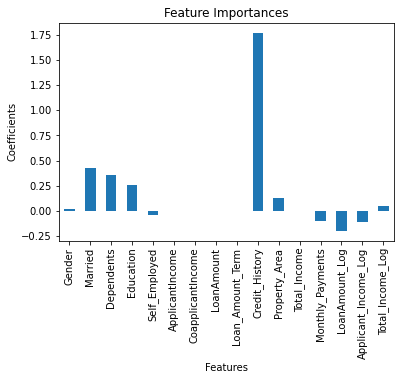

In [309]:
features = pd.Series(lr_model.coef_[0], index = X.columns)
features.plot(kind = 'bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Coefficients')

#### The positive features that predict the probability of getting accepted for a loan are 
A) Credit History: 1.77

B) Dependents: .35

C) Marital Status: 0.43

D) Education: .26

## Predicting the probability of an individual getting accepted for a loan

In [310]:
lr_model.predict(X_val)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [311]:
probabilities = lr_model.predict_proba(X_val)
probabilities = pd.DataFrame(probabilities)
probabilities.set_axis(['Denial Probability', 'Approval Probability'], axis = 1)

,Denial Probability,Approval Probability
0,0.233224,0.766776
1,0.598197,0.401803
2,0.131145,0.868855
3,0.273202,0.726798
4,0.243938,0.756062
...,...,...
149,0.357265,0.642735
150,0.105813,0.894187
151,0.153757,0.846243
152,0.423670,0.576330


## Predicting the probability of an individual getting accepted for a loan for the test set

In [379]:
testing_X = test.drop(columns = 'Loan_ID')

In [401]:
results = test.copy()
results

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Monthly_Payments,LoanAmount_Log,Applicant_Income_Log,Total_Income_Log,Prediction,probability of denial,probability of acceptance
0,LP001015,1,1,0,1,0,5720,0,110,360,1,2,5720,-1.185624,4.700480,8.651724,8.651724,1,0.181628,0.818372
1,LP001022,1,1,1,1,0,3076,1500,126,360,1,2,4576,-1.049822,4.836282,8.031385,8.428581,1,0.134193,0.865807
2,LP001031,1,1,2,1,0,5000,1800,208,360,1,2,6800,-0.548566,5.337538,8.517193,8.824678,1,0.112602,0.887398
3,LP001035,1,1,2,1,0,2340,2546,100,360,0,2,4886,-1.280934,4.605170,7.757906,8.494129,1,0.376380,0.623620
4,LP001051,1,0,0,0,0,3276,0,78,360,1,2,3276,-1.529395,4.356709,8.094378,8.094378,1,0.278060,0.721940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113,360,1,2,5786,-1.158716,4.727388,8.296297,8.663196,1,0.094414,0.905586
363,LP002975,1,1,0,1,0,4158,709,115,360,1,2,4867,-1.141172,4.744932,8.332789,8.490233,1,0.180089,0.819911
364,LP002980,1,0,0,1,0,3250,1993,126,360,0,1,5243,-1.049822,4.836282,8.086410,8.564649,0,0.695936,0.304064
365,LP002986,1,1,0,1,0,5000,2393,158,360,1,0,7393,-0.823509,5.062595,8.517193,8.908289,1,0.240847,0.759153


In [402]:
results['Prediction'] = lr_model.predict(testing_X)
results['Prediction']

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    0
365    1
366    1
Name: Prediction, Length: 367, dtype: int32

In [403]:
Probabilites = pd.DataFrame(lr_model.predict_proba(testing_X))
results['probability of denial'] = Probabilites[0]
results['probability of acceptance'] = Probabilites[1]

### Convert as CSV file

In [406]:
results.to_csv('results.csv', index = False)

In [433]:
result = pd.read_csv('results.csv')
result

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Monthly_Payments,LoanAmount_Log,Applicant_Income_Log,Total_Income_Log,Prediction,probability of denial,probability of acceptance
0,LP001015,1,1,0,1,0,5720,0,110,360,1,2,5720,-1.185624,4.700480,8.651724,8.651724,1,0.181628,0.818372
1,LP001022,1,1,1,1,0,3076,1500,126,360,1,2,4576,-1.049822,4.836282,8.031385,8.428581,1,0.134193,0.865807
2,LP001031,1,1,2,1,0,5000,1800,208,360,1,2,6800,-0.548566,5.337538,8.517193,8.824678,1,0.112602,0.887398
3,LP001035,1,1,2,1,0,2340,2546,100,360,0,2,4886,-1.280934,4.605170,7.757906,8.494129,1,0.376380,0.623620
4,LP001051,1,0,0,0,0,3276,0,78,360,1,2,3276,-1.529395,4.356709,8.094378,8.094378,1,0.278060,0.721940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113,360,1,2,5786,-1.158716,4.727388,8.296297,8.663196,1,0.094414,0.905586
363,LP002975,1,1,0,1,0,4158,709,115,360,1,2,4867,-1.141172,4.744932,8.332789,8.490233,1,0.180089,0.819911
364,LP002980,1,0,0,1,0,3250,1993,126,360,0,1,5243,-1.049822,4.836282,8.086410,8.564649,0,0.695936,0.304064
365,LP002986,1,1,0,1,0,5000,2393,158,360,1,0,7393,-0.823509,5.062595,8.517193,8.908289,1,0.240847,0.759153
